In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader
import numpy as np
import torchvision
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [37]:
dataset = FashionMNIST(root='data/', download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='data/', train=False, transform=transforms.ToTensor())

In [38]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [39]:
img_tensor, label = dataset[0]

In [40]:
img_tensor.shape

torch.Size([1, 28, 28])

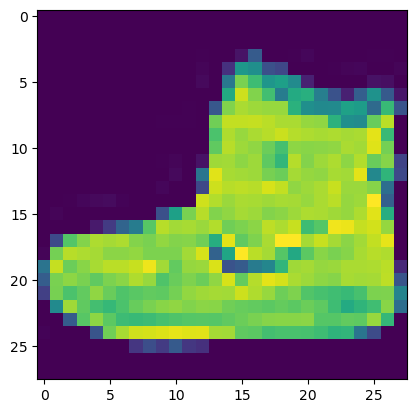

In [41]:
plt.imshow(img_tensor.permute(1,2,0))

8


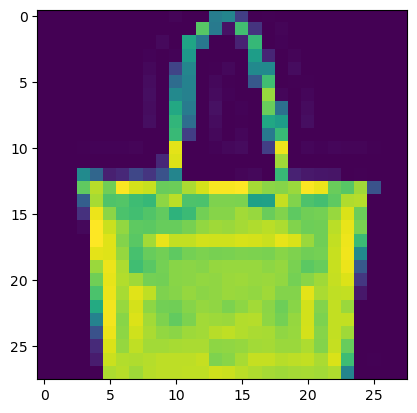

In [42]:
img_tensor, label = dataset[695]
print(label)
plt.imshow(img_tensor.permute(1,2,0))

In [43]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [44]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [45]:
train_loader.dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

8


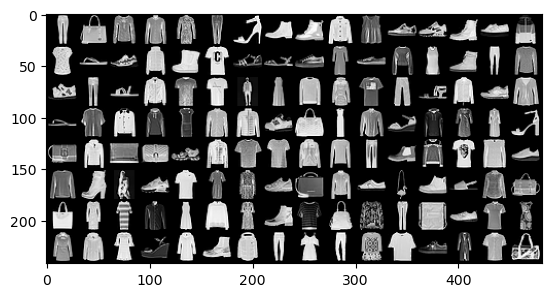

In [46]:
from torchvision.utils import make_grid

for data in train_loader:
    img_tensor, _ = data
    print(label)
    plt.imshow(make_grid(img_tensor,nrow=16).permute(1,2,0))
    break

In [47]:
dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [48]:
num_classes = len(dataset.classes)
num_classes

10

In [49]:
class FModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.net = nn.Sequential( # 28,28,1
            nn.Conv2d(1, 8, kernel_size=4, stride=2, padding=0), # 13,13,8
            nn.BatchNorm2d(8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(8, 16, kernel_size=4, stride=2, padding=1), # 6,6,16
            #nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0), # 4,4,32
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0), # 2,2,64
            #nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(), # 2*2*64 = 256
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Softmax(dim=1),
            nn.Linear(64,num_classes)
            )

    def forward(self, inb):
        return self.net(inb)



In [50]:
def accuracy(preds, labels):
    score = 0
    _, pred_class = torch.max(preds, dim=1)
    score = torch.sum(pred_class == labels) / len(labels)
    return score

@torch.no_grad()
def evaluate(model, batch):
    images, labels = batch
    model.eval()
    preds = model(images)
    loss = F.cross_entropy(preds, labels)
    acc = accuracy(preds, labels)
    return loss, acc

def evaluate_all(model, val_loader):
    loss = 0
    acc = 0
    length = 0
    for batch in val_loader:
        _loss, _acc = evaluate(model,batch)
        loss += _loss
        acc += _acc
        length += 1
    loss /= length
    acc /= length
    return loss, acc

def fit(model, epochs, train_loader, val_loader, opt_function= torch.optim.Adam, lr= 1e-2):
    optimizer = opt_function(params=model.parameters(),lr=lr)
    for epoch in range(epochs):
        for batch in train_loader:
            model.train()
            images, labels = batch
            loss = F.cross_entropy(model(images),labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        loss, acc = evaluate_all(model, val_loader)
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')


In [51]:
model = FModel()
model

FModel(
  (net): Sequential(
    (0): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=256, out_features=128, bias=True)
    (12): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Tanh()
    (14): Linear(in_features=128, out_features=64, bias=True)
    (15): Softmax(dim=1)
    (16): Linear(in_features=64,

In [52]:
for images, labels in train_loader:
    loss,acc = evaluate(model,(images,labels))
    print('Loss:', loss.item())
    print('Accuracy:', acc.item())
    break

Loss: 2.3059985637664795
Accuracy: 0.0703125


In [53]:
evaluate_all(model, train_loader)

(tensor(2.3046), tensor(0.0998))

In [54]:
fit(model,5,train_loader,val_loader,torch.optim.Adam,1e-2)

Epoch: 1/5, Loss: 0.7993370294570923, Accuracy: 0.6665347814559937
Epoch: 2/5, Loss: 0.5635791420936584, Accuracy: 0.8037974834442139
Epoch: 3/5, Loss: 0.42182883620262146, Accuracy: 0.859968364238739
Epoch: 4/5, Loss: 0.37663528323173523, Accuracy: 0.8680775165557861
Epoch: 5/5, Loss: 0.3689168095588684, Accuracy: 0.8729232549667358


In [55]:
fit(model,5,train_loader,val_loader,torch.optim.Adam,2e-2)

Epoch: 1/5, Loss: 0.3561680316925049, Accuracy: 0.8697587251663208
Epoch: 2/5, Loss: 0.34203842282295227, Accuracy: 0.8772745132446289
Epoch: 3/5, Loss: 0.3375955820083618, Accuracy: 0.8771756291389465
Epoch: 4/5, Loss: 0.3433600068092346, Accuracy: 0.875593364238739
Epoch: 5/5, Loss: 0.2925317585468292, Accuracy: 0.8931962251663208


In [56]:
fit(model,10,train_loader,val_loader,torch.optim.Adam,5e-3)

Epoch: 1/10, Loss: 0.27193623781204224, Accuracy: 0.903085470199585
Epoch: 2/10, Loss: 0.2710529863834381, Accuracy: 0.9046677350997925
Epoch: 3/10, Loss: 0.27336686849594116, Accuracy: 0.8988330960273743
Epoch: 4/10, Loss: 0.27325573563575745, Accuracy: 0.903085470199585
Epoch: 5/10, Loss: 0.27746814489364624, Accuracy: 0.9020965099334717
Epoch: 6/10, Loss: 0.2734176218509674, Accuracy: 0.9058544039726257
Epoch: 7/10, Loss: 0.2775704264640808, Accuracy: 0.9022942781448364
Epoch: 8/10, Loss: 0.27531224489212036, Accuracy: 0.9059533476829529
Epoch: 9/10, Loss: 0.27703553438186646, Accuracy: 0.90625
Epoch: 10/10, Loss: 0.2896442413330078, Accuracy: 0.9023932218551636


In [57]:
fit(model,10,train_loader,val_loader,torch.optim.Adam,1e-3)

Epoch: 1/10, Loss: 0.27308589220046997, Accuracy: 0.9096123576164246
Epoch: 2/10, Loss: 0.27753639221191406, Accuracy: 0.9095134735107422
Epoch: 3/10, Loss: 0.27958011627197266, Accuracy: 0.9077333807945251
Epoch: 4/10, Loss: 0.282713919878006, Accuracy: 0.9087222814559937
Epoch: 5/10, Loss: 0.28515076637268066, Accuracy: 0.9084256291389465
Epoch: 6/10, Loss: 0.28963935375213623, Accuracy: 0.9083267450332642
Epoch: 7/10, Loss: 0.2941586375236511, Accuracy: 0.9082278609275818
Epoch: 8/10, Loss: 0.29737940430641174, Accuracy: 0.9085245132446289
Epoch: 9/10, Loss: 0.29962292313575745, Accuracy: 0.908030092716217
Epoch: 10/10, Loss: 0.29831981658935547, Accuracy: 0.9076344966888428


In [58]:
evaluate_all(model, val_loader)

(tensor(0.2983), tensor(0.9076))

90% is really satisfying result. Let's explore some predictions and some misspredictions:

Label:Ankle boot
Predicted:Ankle boot


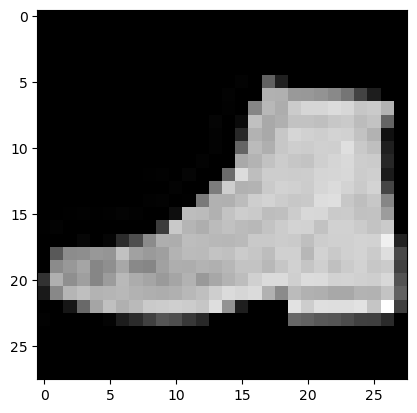

In [59]:
img, label = test_dataset[208]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

Label:Pullover
Predicted:Pullover


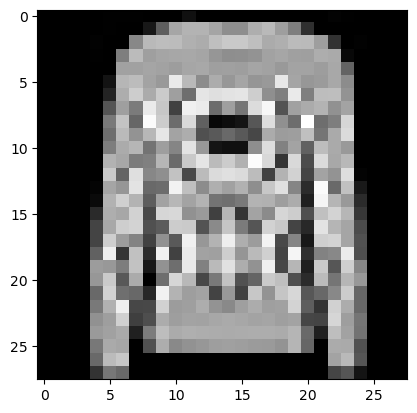

In [60]:
img, label = test_dataset[468]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

Label:Sneaker
Predicted:Sneaker


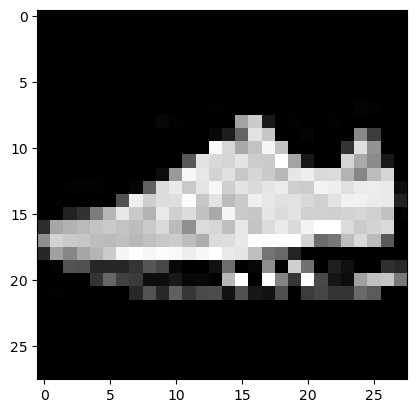

In [61]:
img, label = test_dataset[901]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

Now, let's have a look at some misspredictions and try to figure out why:

Label:Dress
Predicted:Shirt


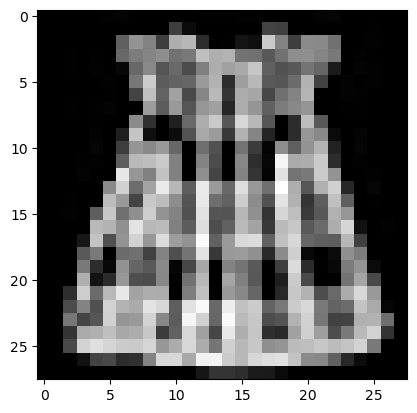

In [78]:
img, label = test_dataset[1326]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

Label:Coat
Predicted:Shirt


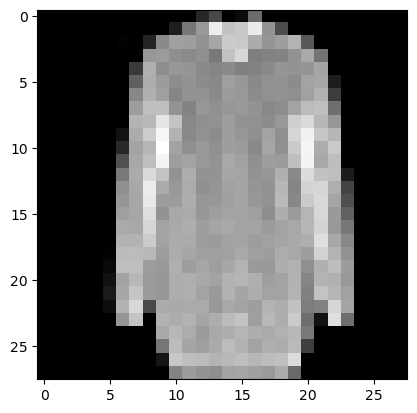

In [63]:
img, label = test_dataset[2684]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

Label:Pullover
Predicted:Dress


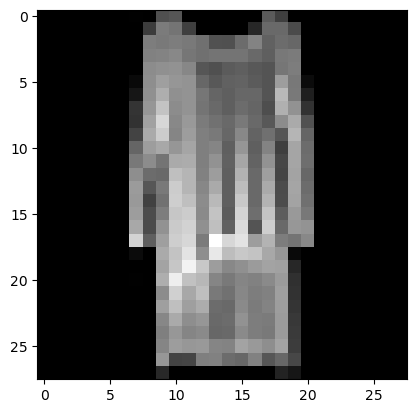

In [64]:
img, label = test_dataset[3489]
print('Label:' + dataset.classes[label])
_, pred_class = torch.max(model(torch.reshape(img,(1,1,28,28))), dim=1)
print('Predicted:' + dataset.classes[pred_class])
plt.imshow(img.permute(1, 2, 0),cmap='gray');

It is very hard even for a human to clasify correctly the above images. In other words, the misspredictions occur due to the fact that the resolution of the dataset is not good enough. Hence, any further actions cannot improve the result.